# Neural network from scratch

In [164]:
import numpy as np
import matplotlib.pyplot

In [165]:
input_size = 2
layer = [2,3]
output_size = 2

In [166]:
def softmax(z3):
    epa = np.exp(z3)
    ans = epa/np.sum(epa,axis = 1,keepdims = True)
    return ans

In [167]:
class neuralnetwork:
    def __init__(self,input_size,layer,output_size):
        np.random.seed(10)
        model = {}
        model['W1'] = np.random.randn(input_size,layer[0])
        model['B1'] = np.random.randn(1,layer[0])
        
        model['W2'] = np.random.randn(layer[0],layer[1])
        model['B2'] = np.random.randn(1,layer[1])
        
        model['W3'] = np.random.randn(layer[1],output_size)
        model['B3'] = np.random.randn(1,output_size)
        
        self.model = model
        
    def forward(self,x):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['B1'],self.model['B2'],self.model['B3']
        
        z1 = np.dot(x,w1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,w2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,w3) + b3
        y_ = softmax(z3)
        self.activation = a1,a2,y_
        return y_
    
    
    def backword(self,x,y,LR =0.0001):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['B1'],self.model['B2'],self.model['B3']
        a1,a2,y_ = self.activation
        m = x.shape[0]
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis = 0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,w3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis = 0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,w2.T)
        dw1  = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis = 0)/float(m)
        
        ## update weights and bias
        
        self.model["W3"] -= LR*dw3
        self.model["B3"] -= LR*db3
        self.model["W2"] -= LR*dw2
        self.model["B2"] -= LR*db2
        self.model["W1"] -= LR*dw1
        self.model["B1"] -= LR*db1

        return model
    def predict(self,x):
        yout = self.forward(x)
        return np.argmax(yout,axis = 1)

In [168]:
def loss(y_o,p):
    l = -np.mean(y_o*np.log(p))
    return l

def one_hot(y,x,depth):
    m = x.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [169]:
from sklearn.datasets import make_circles


In [170]:
import matplotlib.pyplot as plt

In [171]:

X,y = make_circles(n_samples=500,shuffle=True,noise=None,random_state=10)

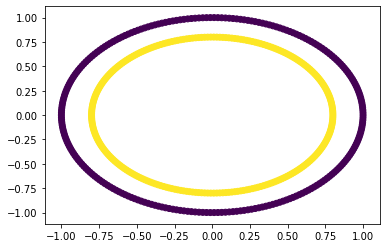

In [172]:
plt.scatter(X[:,0],X[:,1],c= y)
plt.show()

In [173]:
model = neuralnetwork(input_size = 2,layer = [2,3],output_size = 2)

In [174]:
y_ = model.forward(X)
print(y_.shape)
print(y.shape)

(500, 2)
(500,)


In [175]:
def train(X,y,model,epoch,lr):
    training_loss = []
    y_ac = one_hot(y,X,2)
   
    for ix in range(epoch):
        y_p = model.forward(X)
        l = loss(y_ac,y_p)
        training_loss.append(l)
        model.backword(X,y_ac,lr)
    return training_loss

In [191]:
losss = train(X,y,model,1000,0.001)

In [192]:
print(X.shape)

(500, 2)


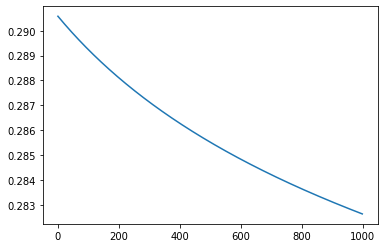

In [193]:
plt.plot(losss)

In [194]:
output = model.predict(X)

# Accuracy 

In [195]:
acc = np.sum(output == y)/y.shape[0]

In [196]:
acc

0.692